Import Libraries

In [142]:
import os
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from random import sample
import random

In [143]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

### KNN function

In [ ]:
def knn(reducedTrainD, reducedTestD, labelsTrain, labelsTest, k ):
  c=KNeighborsClassifier(n_neighbors = k)
  c.fit(reducedTrainD,labelsTrain)
  labelsPred=c.predict(reducedTestD)
  accuracy = metrics.accuracy_score(labelsTest, labelsPred)
  return accuracy

## Part 2 : Generate the Data Matrix and the Label vector

In [ ]:
D = [] # Data matrix
y = [] # Labels
for i in range(1,41): # 40 people
  for j in range(1,11): # 10 images per person
    img_name = "faces/s"+str(i)+"/"+str(j)+".pgm" # Image name
    img = cv2.imread(img_name,cv2.IMREAD_GRAYSCALE) # Read image
    img = img.flatten() # Flatten image
    D.append(img) # Add image to data matrix
    y.append(i) # Add label to labels
D = np.array(D) # Convert to numpy array
y = np.array(y) # Convert to numpy array

## Part 3 : Split the Dataset into Training and Test sets

In [ ]:
testData = np.array([D[i] for i in range(0,400,2)]) # Test data
trainData = np.array([D[i] for i in range(1,400,2)]) # Train data

testLabel = np.array([y[i] for i in range(0,400,2)]) # Test labels
trainLabel = np.array([y[i] for i in range(1,400,2)]) # Train labels

In [ ]:
print(trainData.shape)
print(testData.shape)

(200, 10304)
(200, 10304)


## Part4 : Classification using PCA

Compute Mean

In [ ]:
trainMean = np.mean(trainData, axis=0) # Compute Train mean
testMean= np.mean(testData, axis=0) # Compute Test mean
print(trainMean)
print(testMean)
trainMean.shape

[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
[86.115 86.265 86.685 ... 76.5   77.395 77.085]


(10304,)

Center the Data

In [ ]:
trainCenter= trainData - trainMean # Center train data
testCenter= testData- testMean # Center test data

Compute Covariance Matrix

In [ ]:
cova=np.cov(trainCenter, rowvar=False, bias=True) # Compute covariance matrix

Get Eigen vectors and Eigen Values of covariance matrix

In [ ]:
eigenVal, eigenVec = np.linalg.eigh(cova) # Compute eigenvalues and eigenvectors
indices = eigenVal.argsort()[::-1] # Get the indices that would sort an array in descending order
eigenVal=eigenVal[indices] # get eigenvalues in descending order
eigenVec=eigenVec[:,indices] # get eigenvectors in descending order
print(eigenVal)
print("\n")
print(eigenVec)
eigenVec.shape

[ 2.76884465e+06  2.14179597e+06  1.06569341e+06 ... -5.18435272e-10
 -6.91023743e-10 -8.59309721e-10]


[[ 1.24555558e-03 -1.53617120e-02 -1.89107867e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.26453637e-03 -1.51314624e-02 -1.91177650e-02 ... -9.08428736e-03
   2.31362434e-01 -5.73029414e-01]
 [ 1.56464522e-03 -1.51619504e-02 -1.90394178e-02 ... -9.90180407e-02
   1.41797236e-01  3.06490246e-01]
 ...
 [ 8.73724732e-03  9.61111754e-03 -1.28745102e-02 ... -1.05408722e-03
   6.84380384e-03  1.20837946e-02]
 [ 7.21705083e-03  7.75970197e-03 -1.37731826e-02 ... -3.25913788e-03
   8.54333033e-03  7.44993323e-03]
 [ 8.40080072e-03  6.92707821e-03 -1.43881511e-02 ... -4.97809370e-04
   1.44238183e-02  1.19810538e-02]]


(10304, 10304)

Project the training set, and test sets separately for differenet alpha

In [ ]:
alpha=np.array([0.8,0.85,0.9,0.95])
accuracies=np.array([])
totval= np.sum(eigenVal)
explained=0
for a in alpha:
  r=0
  sum=0
  while explained <= a:
    sum = sum+eigenVal[r]
    explained=sum/totval
    r=r+1
  
  if a==0.8:
    p1=eigenVec[:,:r]
    reducedTrain1=np.dot(trainCenter, p1)
    reducedTest1=np.dot(testCenter, p1)
  elif a==0.85:
    p2=eigenVec[:,:r]
    reducedTrain2=np.dot(trainCenter, p2)
    reducedTest2=np.dot(testCenter, p2)
  elif a==0.9:
    p3=eigenVec[:,:r]
    reducedTrain3=np.dot(trainCenter, p3)
    reducedTest3=np.dot(testCenter, p3)
  else:
    p4=eigenVec[:,:r]
    reducedTrain4=np.dot(trainCenter, p4)
    reducedTest4=np.dot(testCenter, p4)

In [ ]:

for a in alpha:
  print("\n")
  print("alpha =", a , "dimensions=", r)
  print("n-neighbors=", 1)
  if a==0.8:
    a1=knn(reducedTrain1,reducedTest1,trainLabel, testLabel,1)
    accuracies=np.append(accuracies,a1)
    print("accuracy:", a1)
  elif a==0.85:
    a2=knn(reducedTrain2,reducedTest2,trainLabel, testLabel,1)
    accuracies=np.append(accuracies,a2)
    print("accuracy:", a2)
  elif a==0.9:
    a3=knn(reducedTrain3,reducedTest3,trainLabel, testLabel,1)
    accuracies=np.append(accuracies,a3)
    print("accuracy:", a3)
  else:
      a4=knn(reducedTrain4,reducedTest4,trainLabel, testLabel,1)
      accuracies=np.append(accuracies,a4)
      print("accuracy:", a4)



alpha = 0.8 dimensions= 116
n-neighbors= 1
accuracy: 0.93


alpha = 0.85 dimensions= 116
n-neighbors= 1
accuracy: 0.935


alpha = 0.9 dimensions= 116
n-neighbors= 1
accuracy: 0.94


alpha = 0.95 dimensions= 116
n-neighbors= 1
accuracy: 0.935


Relation between alpha and classification accuracy

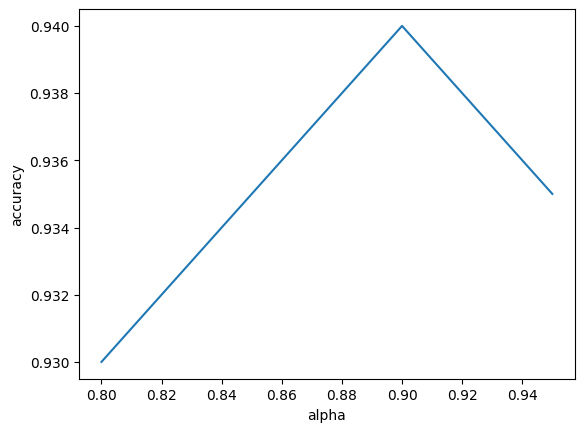

In [ ]:
plt.plot(alpha, accuracies)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.show()

## Classification Using LDA

Calculate the mean vector for every class Mu1, Mu2, ..., Mu40


In [164]:
Mu = np.zeros((40,10304)) # 40 means, each of size 10304
for i in range(40): # For each person
  Mu[i] = np.mean(trainData[i*5:i*5+5], axis=0) # Compute mean of 5 images

In [165]:
Mu

array([[ 48.8,  48. ,  40.6, ...,  62.2,  56. ,  59.4],
       [ 35.2,  35.8,  35.6, ...,  71.8,  71.6,  71.6],
       [105.2, 104. , 107.4, ...,  50. ,  48.4,  50. ],
       ...,
       [109.8, 108.6, 109.6, ...,  68.2,  68. ,  65. ],
       [ 84.6,  83.4,  85.2, ..., 115.8, 119.8, 117.4],
       [126. , 123.6, 125.8, ...,  47.8,  46. ,  49. ]])

Generate class specific subsets


In [167]:
D = np.zeros((40,5,10304)) # 40 people, 5 images per person, each image of size 10304
for i in range(40):
  D[i] = trainData[i*5:i*5+5]
  

In [168]:
D

array([[[ 60.,  60.,  62., ...,  32.,  34.,  34.],
        [ 63.,  53.,  35., ...,  41.,  10.,  24.],
        [ 43.,  50.,  41., ..., 158., 153., 169.],
        [ 44.,  43.,  32., ...,  43.,  43.,  37.],
        [ 34.,  34.,  33., ...,  37.,  40.,  33.]],

       [[ 37.,  35.,  35., ...,  26.,  28.,  28.],
        [ 34.,  36.,  35., ...,  32.,  25.,  25.],
        [ 34.,  35.,  35., ...,  31.,  24.,  24.],
        [ 34.,  39.,  35., ..., 135., 138., 148.],
        [ 37.,  34.,  38., ..., 135., 143., 133.]],

       [[100.,  99., 108., ...,  44.,  42.,  44.],
        [105., 102., 108., ...,  42.,  35.,  37.],
        [110., 106., 109., ...,  49.,  53.,  53.],
        [107., 104., 109., ...,  58.,  56.,  57.],
        [104., 109., 103., ...,  57.,  56.,  59.]],

       ...,

       [[104., 106., 107., ...,  65.,  59.,  73.],
        [110., 111., 114., ...,  65.,  72.,  65.],
        [114., 112., 110., ...,  67.,  70.,  68.],
        [113., 109., 113., ...,  72.,  66.,  71.],
        [108

Mean Vector for every class

In [183]:
μ = np.mean(D, axis=1)

In [184]:
μ

array([[ 48.8,  48. ,  40.6, ...,  62.2,  56. ,  59.4],
       [ 35.2,  35.8,  35.6, ...,  71.8,  71.6,  71.6],
       [105.2, 104. , 107.4, ...,  50. ,  48.4,  50. ],
       ...,
       [109.8, 108.6, 109.6, ...,  68.2,  68. ,  65. ],
       [ 84.6,  83.4,  85.2, ..., 115.8, 119.8, 117.4],
       [126. , 123.6, 125.8, ...,  47.8,  46. ,  49. ]])

Calculate the between class metrices

In [185]:
Sb = np.zeros((10304,10304)) # Between class scatter matrix
for i in range(40):
  Sb[i] = 5*np.matmul((μ[i] - trainMean).T, (μ[i] - trainMean))

In [186]:
Sb

array([[73158015.45075, 73158015.45075, 73158015.45075, ...,
        73158015.45075, 73158015.45075, 73158015.45075],
       [40524767.60075, 40524767.60075, 40524767.60075, ...,
        40524767.60075, 40524767.60075, 40524767.60075],
       [23000269.89075, 23000269.89075, 23000269.89075, ...,
        23000269.89075, 23000269.89075, 23000269.89075],
       ...,
       [       0.     ,        0.     ,        0.     , ...,
               0.     ,        0.     ,        0.     ],
       [       0.     ,        0.     ,        0.     , ...,
               0.     ,        0.     ,        0.     ],
       [       0.     ,        0.     ,        0.     , ...,
               0.     ,        0.     ,        0.     ]])

Compute cener class matrices

In [187]:
# Compute Z
Z = np.zeros((40,5,10304)) # 40 people, 5 images per person, each image of size 10304
for i in range(40):
    Z[i] = D[i] - μ[i].T 

In [188]:
Z

array([[[ 11.2,  12. ,  21.4, ..., -30.2, -22. , -25.4],
        [ 14.2,   5. ,  -5.6, ..., -21.2, -46. , -35.4],
        [ -5.8,   2. ,   0.4, ...,  95.8,  97. , 109.6],
        [ -4.8,  -5. ,  -8.6, ..., -19.2, -13. , -22.4],
        [-14.8, -14. ,  -7.6, ..., -25.2, -16. , -26.4]],

       [[  1.8,  -0.8,  -0.6, ..., -45.8, -43.6, -43.6],
        [ -1.2,   0.2,  -0.6, ..., -39.8, -46.6, -46.6],
        [ -1.2,  -0.8,  -0.6, ..., -40.8, -47.6, -47.6],
        [ -1.2,   3.2,  -0.6, ...,  63.2,  66.4,  76.4],
        [  1.8,  -1.8,   2.4, ...,  63.2,  71.4,  61.4]],

       [[ -5.2,  -5. ,   0.6, ...,  -6. ,  -6.4,  -6. ],
        [ -0.2,  -2. ,   0.6, ...,  -8. , -13.4, -13. ],
        [  4.8,   2. ,   1.6, ...,  -1. ,   4.6,   3. ],
        [  1.8,   0. ,   1.6, ...,   8. ,   7.6,   7. ],
        [ -1.2,   5. ,  -4.4, ...,   7. ,   7.6,   9. ]],

       ...,

       [[ -5.8,  -2.6,  -2.6, ...,  -3.2,  -9. ,   8. ],
        [  0.2,   2.4,   4.4, ...,  -3.2,   4. ,   0. ],
        [  4

Compute class scatter matrices

In [189]:
S = np.zeros((10304,10304))  # Within class scatter matrix
for i in range(40):
  S += np.matmul(Z[i].T, Z[i])
  

In [190]:
S

array([[ 28496.8,  27128.2,  27372.4, ...,  -3977.2,  -3511.6,    539. ],
       [ 27128.2,  28448.8,  27518.6, ...,  -2697.2,  -2349.2,   1781.6],
       [ 27372.4,  27518.6,  28698.4, ...,  -3472.2,   -923.2,   3416.2],
       ...,
       [ -3977.2,  -2697.2,  -3472.2, ..., 140034. ,  83425.8,  64222.2],
       [ -3511.6,  -2349.2,   -923.2, ...,  83425.8,  99585.6,  82754.4],
       [   539. ,   1781.6,   3416.2, ...,  64222.2,  82754.4, 104148.8]])

compute S inverse

In [191]:
S_inverse = np.linalg.inv(S)

In [192]:
S_inverse

array([[ 2.13369455e+11,  2.98718187e+10, -5.77915973e+11, ...,
         4.43224524e+10,  1.30480471e+11,  7.79724421e+10],
       [ 7.78661695e+08, -9.12174727e+09,  1.97145616e+09, ...,
        -4.53033398e+09, -3.44420571e+09,  4.85065900e+09],
       [-8.89312543e+10, -1.69603329e+10,  2.55813116e+11, ...,
        -2.04785265e+10, -5.45300148e+10, -3.25793526e+10],
       ...,
       [ 1.09467807e+10,  3.61834514e+09, -2.50034294e+10, ...,
         2.59541841e+09,  5.65692337e+09,  2.08886902e+09],
       [-1.08770098e+09,  5.87125474e+08, -5.16179409e+08, ...,
         3.15717992e+08, -1.12837161e+09, -8.31816717e+08],
       [ 1.40275980e+10,  2.79707696e+09, -3.83436854e+10, ...,
         2.94584658e+09,  9.17069582e+09,  4.54065567e+09]])

Compute eigenvalues and eigenvectors

In [193]:
eigVal, eigVec = np.linalg.eigh((S_inverse @ Sb))

In [194]:
eigVal

array([-8.20468689e+22, -2.75798655e+22, -1.72619807e+22, ...,
        1.70399841e+22,  2.75757396e+22,  8.20100966e+22])

In [195]:
eigVec

array([[ 0.00994758, -0.01243846,  0.01266081, ..., -0.01327289,
         0.01213907,  0.00991986],
       [ 0.0099724 , -0.01253079,  0.01281097, ..., -0.01311342,
         0.01204894,  0.0098951 ],
       [ 0.00999448, -0.01261312,  0.01294515, ..., -0.0129726 ,
         0.01196918,  0.00987313],
       ...,
       [-0.00702659, -0.00648075, -0.00702191, ..., -0.00656521,
        -0.00644957,  0.00700869],
       [-0.00028908, -0.0002633 , -0.00028205, ..., -0.00027998,
        -0.00027198,  0.00029197],
       [-0.01113556, -0.01027246, -0.01113214, ..., -0.01039861,
        -0.01021724,  0.01110507]])

Use 39 dominant eigenvectors instead of just one

In [196]:
weights = eigVec[:,-39:]
weights

array([[-0.01143998,  0.01259398, -0.0087282 , ..., -0.01327289,
         0.01213907,  0.00991986],
       [-0.00941987,  0.01043346, -0.00727973, ..., -0.01311342,
         0.01204894,  0.0098951 ],
       [-0.00778381,  0.00867885, -0.00609978, ..., -0.0129726 ,
         0.01196918,  0.00987313],
       ...,
       [-0.00473054, -0.00328251, -0.00657019, ..., -0.00656521,
        -0.00644957,  0.00700869],
       [-0.00028204, -0.00019401, -0.00038455, ..., -0.00027998,
        -0.00027198,  0.00029197],
       [-0.00744688, -0.00516831, -0.01034689, ..., -0.01039861,
        -0.01021724,  0.01110507]])

Project the training set, and test sets separately using the same projection matrix U

In [197]:
projectedTrain = weights.T @ trainData.T
projectedTest = weights.T @ testData.T


In [198]:
projectedTest.shape

(39, 200)

Apply KNN

In [200]:
result = knn(projectedTrain.T, projectedTest.T, trainLabel, testLabel,1 )

Accuracy for the multi class LDA

In [202]:
print("Accuracy:", result)

Accuracy: 0.945


Compare the results to PCA results.

In [207]:
# Compare PCA vs LDA results
print("PCA Accuracy:", a3)
print("LDA Accuracy:", result)

PCA Accuracy: 0.94
LDA Accuracy: 0.945


## Part 6 Classifier Tuning

Compare PCA result with different K and alpha

In [213]:
for k in range(1, 8, 2):
    for a in alpha:
        # print("\n")
        # print("alpha =", a , "dimensions=", r)
        # print("n-neighbors=", 1)
        if a==0.8:
            a1=knn(reducedTrain1,reducedTest1,trainLabel, testLabel,k)
            accuracies=np.append(accuracies,a1)
            # print("accuracy:", a1)
        elif a==0.85:
            a2=knn(reducedTrain2,reducedTest2,trainLabel, testLabel,k)
            accuracies=np.append(accuracies,a2)
            # print("accuracy:", a2)
        elif a==0.9:
            a3=knn(reducedTrain3,reducedTest3,trainLabel, testLabel,k)
            accuracies=np.append(accuracies,a3)
            # print("accuracy:", a3)
        else:
            a4=knn(reducedTrain4,reducedTest4,trainLabel, testLabel,k)
            accuracies=np.append(accuracies,a4)
            # print("accuracy:", a4)

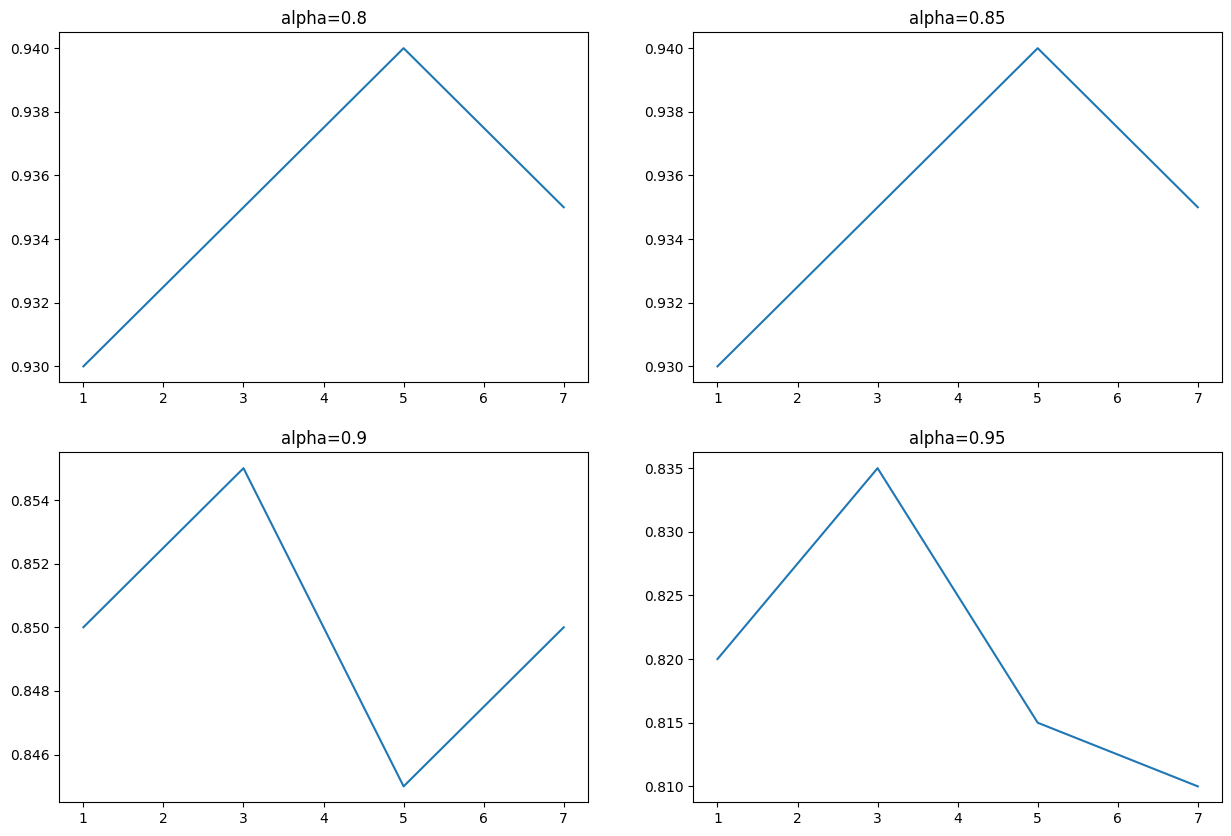

In [211]:
k=np.array([1,3,5,7])
figure, axis= plt.subplots(2,2, figsize=(15,10))
axis[0, 0].plot(k, accuracies[0:4])
axis[0, 0].set_title("alpha=0.8")

axis[0, 1].plot(k, accuracies[4:8])
axis[0, 1].set_title("alpha=0.85")

axis[1, 0].plot(k, accuracies[8:12])
axis[1, 0].set_title("alpha=0.9")

axis[1, 1].plot(k, accuracies[12:16])
axis[1, 1].set_title("alpha=0.95")

plt.show()

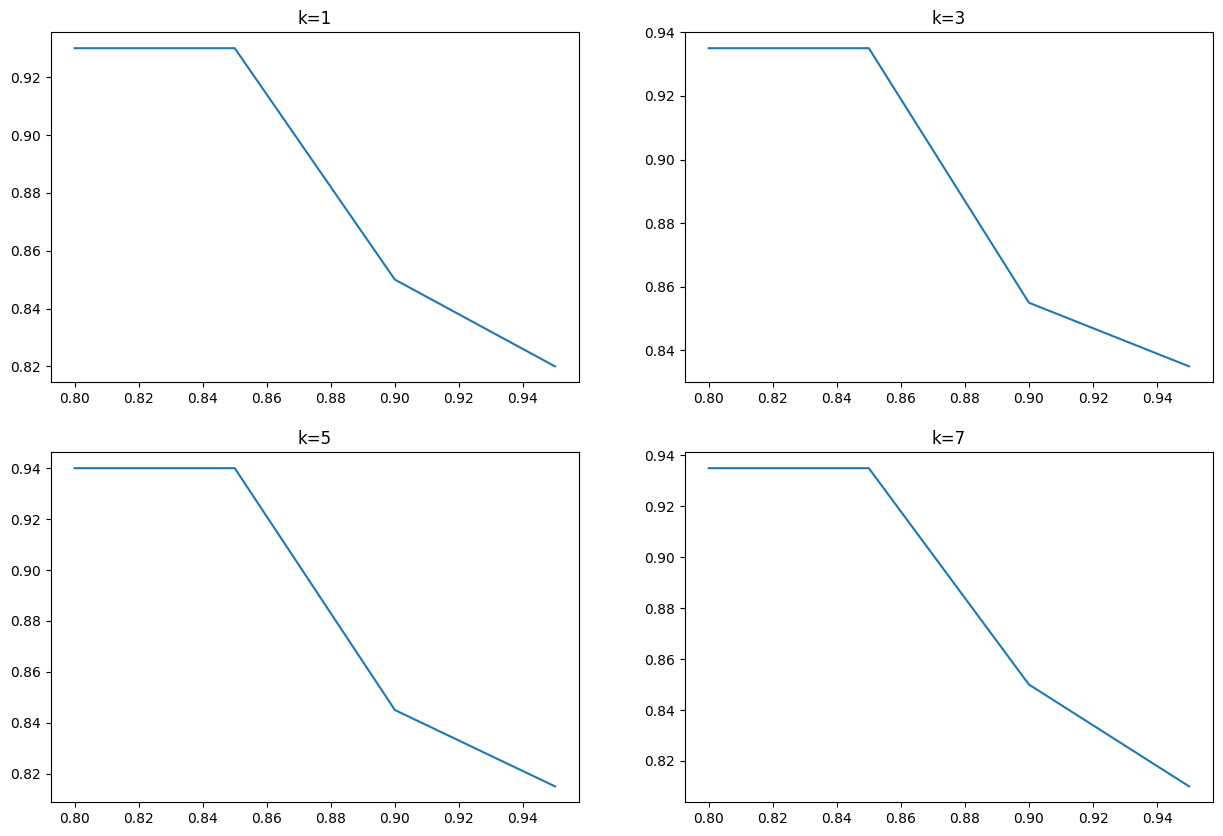

In [212]:
figure, axis= plt.subplots(2,2, figsize=(15,10))
axis[0, 0].plot(alpha, accuracies[0:16:4])
axis[0, 0].set_title("k=1")

axis[0, 1].plot(alpha, accuracies[1:16:4])
axis[0, 1].set_title("k=3")

axis[1, 0].plot(alpha, accuracies[2:16:4])
axis[1, 0].set_title("k=5")

axis[1, 1].plot(alpha, accuracies[3:16:4])
axis[1, 1].set_title("k=7")

plt.show()

Compare LDA results for different K

In [220]:
LDAaccuracies = np.array([])
kArray=np.array([])
for k in range(1, 8, 2):
    LDAaccuracies =  np.append(LDAaccuracies, knn(projectedTrain.T, projectedTest.T, trainLabel, testLabel,k ))
    kArray= np.append(kArray, k)

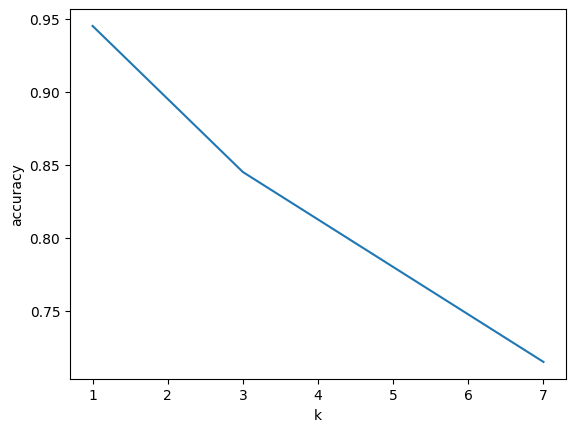

In [222]:
plt.plot(kArray, LDAaccuracies)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()